In [87]:
#Pierce Zhang, CMOR 220, Fall 2023, Competency on bridge
#competency_bridge.ipynb
#Plots the specific bridge as documented in the competency
#Last Modified: December 1, 2023

In [88]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [106]:
def build_basic_bridge():
    """
    Outputs:
        - adj, (np.ndarray) the adjacency matrix of the bridge
        - xc, (np.ndarray) the x-coords of the bridge fibers
        - yc, (np.ndarray) the y-coords of the bridge fibers
        - len, (np.ndarray) the lengths of each bridge fiber
    """
    num_nodes = 4
    num_fibers = 9
    s = 1/math.sqrt(2)
    
    adj = np.zeros((num_fibers, 2*num_nodes))
    xc = np.zeros((num_fibers, 2))
    yc = np.zeros((num_fibers, 2))
    length = np.ones(num_fibers)
   

    # Build the left part of bridge.
    adj[0,0] = 1
    adj[1,2:4] = [s, s]
    xc[0] = [0, 1]
    yc[0] = [0, 0]
    xc[1] = [0, 1]
    yc[1] = [0, 1]
    length[1] = 1/s
    
    # Build the middle part of bridge.
    adj[2,:] = [0, -1, 0, 1, 0, 0, 0, 0]  
    adj[3,:] = [0, 0, -1, 0, 0, 0, 1, 0] 
    adj[4,:] = [-1, 0, 0, 0, 1, 0, 0, 0] 

    # Add the coordinates
    xc[2] = [1, 1] 
    yc[2] = [0, 1]  
    xc[3] = [1, 2] 
    yc[3] = [1, 1] 
    xc[4] = [1, 2] 
    yc[4] = [0, 0] 

    # Build the right part of bridge.
    adj[-3,-3:] = [-1, 0, 1] 
    adj[-2,-2:] = [-s, s]
    adj[-1,-4]  = -1 
    
    # Add coordinates
    xc[-3] = [2, 2]
    yc[-3] = [0, 1]
    xc[-2] = [2, 3]
    yc[-2] = [1, 0]
    length[-2] = 1/s
    xc[-1] = [2, 3]
    yc[-1] = [0, 0]
    
    # Last fiber
    xc[-4] = [1, 3]
    yc[-4] = [1, 0]
    length[-4] = math.sqrt(5)
    adj[-4,2] = -2/math.sqrt(5)
    adj[-4,3] = 1/math.sqrt(5)
    return adj, xc, yc, length

In [107]:
def plot_bridge(xc,yc,car_weight=0,work=0):
    plt.figure()
    # Plot the fibers of the bridge.
    plt.plot(np.transpose(xc), np.transpose(yc), 'b', linewidth=3);
    # Plots the land area surrounding the bridge.
    plt.fill([0, 0.5, -1, -1], [0, -1, -1, 0], 'k')
    plt.fill([3, 4, 4, 2.5], [0, 0, -1, -1], 'k')
   # plt.title(" 1 Section Bridge when there are no cars")
    plt.title(f'{1} Section Bridge When Cars Weight {car_weight} Units (Work = {work:.5f})')

[[ 1.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 0.          0.          0.70710678  0.70710678  0.          0.
   0.          0.        ]
 [ 0.         -1.          0.          1.          0.          0.
   0.          0.        ]
 [ 0.          0.         -1.          0.          0.          0.
   1.          0.        ]
 [-1.          0.          0.          0.          1.          0.
   0.          0.        ]
 [ 0.          0.         -0.89442719  0.4472136   0.          0.
   0.          0.        ]
 [ 0.          0.          0.          0.          0.         -1.
   0.          1.        ]
 [ 0.          0.          0.          0.          0.          0.
  -0.70710678  0.70710678]
 [ 0.          0.          0.          0.         -1.          0.
   0.          0.        ]]


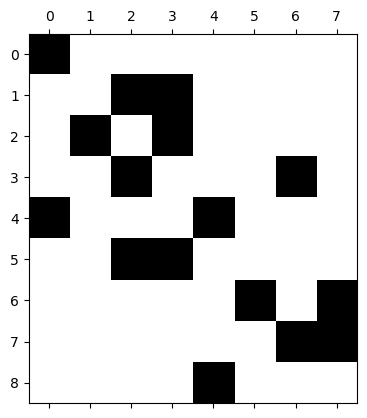

In [108]:
adj, xc, yc, length = build_basic_bridge()
print(adj)
plt.spy(adj)

In [122]:
def construct_force_vector(car_weight):
    force = np.zeros(8)
    for i in range(0,4,2):
        force[2*(i+1)-1] = -car_weight
    return force

In [123]:
force = construct_force_vector(0.01)
force

array([ 0.  , -0.01,  0.  ,  0.  ,  0.  , -0.01,  0.  ,  0.  ])

In [136]:
def deform_basic_bridge(adj,xc,yc,length,force):
    dx = xc
    dy = yc
    matrix = np.transpose(adj)@np.diag(np.divide(1,length))@adj
    displacements = np.linalg.solve(np.transpose(matrix)@matrix+0.001*np.eye(8),np.transpose(matrix)@force)
    #displacements = np.linalg.solve(matrix,force)
    X = displacements[::2]
    Y = displacements[1::2]
    work = np.transpose(displacements)@force
    
    # left
    dx[0] += [0,X[0]]
    dy[0] = yc[0]+[0,Y[0]]
    dx[1] = xc[1]+[0,X[1]]
    dy[1] = yc[1]+[0,Y[1]]
    
    #middle
    dx[2] = xc[2]+[X[0],X[1]]
    dy[2] = yc[2]+[Y[0],Y[1]]
    dx[3] = xc[3]+[X[1],X[3]]
    dy[3] = yc[3]+[Y[1],Y[3]]
    dx[4] = xc[4]+[X[0],X[2]]
    dy[4] = yc[4]+[Y[0],Y[2]]
    
    #right
    dx[-3] = xc[-3]+[X[2],X[3]]
    dy[-3] = yc[-3]+[Y[2],Y[3]]
    dx[-2] = xc[-2]+[X[3],0]
    dy[-2] = yc[-2]+[Y[3],0]
    dx[-1] = xc[-1]+[X[2],0]
    dy[-1] = yc[-1]+[Y[2],0]
    
    #last
    dx[-4] = xc[-4] + [X[1],X[3]]
    dy[-4] = yc[-4] + [Y[1],Y[3]]
    
    return dx,dy,work,X,Y

    

In [139]:
def build_load_plot_basic_bridge():
    
    adj,xc,yc,length=build_basic_bridge()
    for car_weight in [0,0.05]:
        force = construct_force_vector(car_weight)
        dx,dy,work,X,Y = deform_basic_bridge(adj,xc,yc,length,force)
        plot_bridge(dx,dy,car_weight,work)

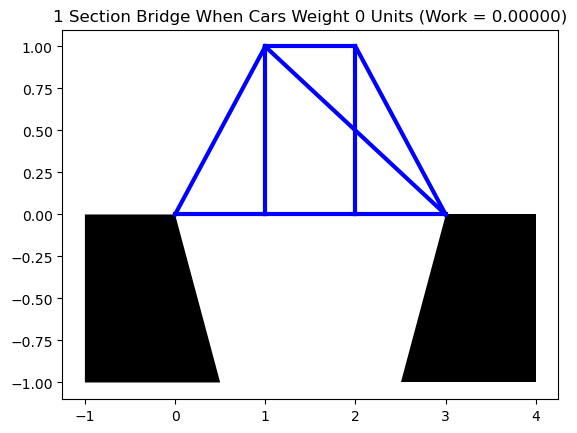

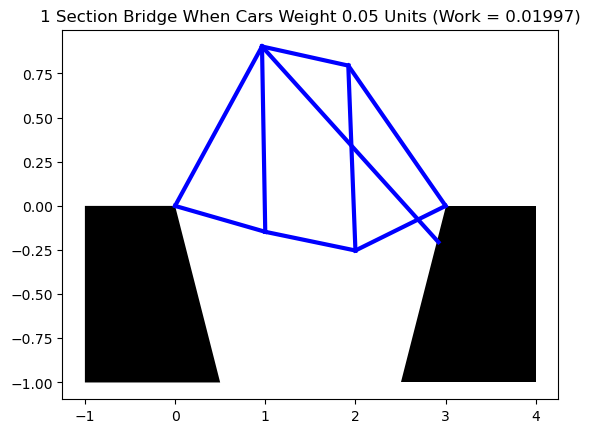

In [140]:
build_load_plot_basic_bridge()

In [86]:
adj,xc,yc,length=build_basic_bridge()
stiffness = np.transpose(adj)@np.diag(np.divide(1,length))@adj
np.linalg.inv(stiffness)

array([[ 6.66666667e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  3.33333333e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  3.43613068e+15, -3.43613068e+15,
         3.43613068e+15,  0.00000000e+00, -3.43613068e+15,
        -3.43613068e+15, -3.43613068e+15],
       [ 0.00000000e+00, -3.43613068e+15,  3.43613068e+15,
        -3.43613068e+15,  0.00000000e+00,  3.43613068e+15,
         3.43613068e+15,  3.43613068e+15],
       [ 0.00000000e+00,  3.43613068e+15, -3.43613068e+15,
         3.43613068e+15,  0.00000000e+00, -3.43613068e+15,
        -3.43613068e+15, -3.43613068e+15],
       [ 3.33333333e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  6.66666667e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -3.43613068e+15,  3.43613068e+15,
        -3.43613068e+15,  0.00000000e+00,  3.43613068e+15,
         3.43613068e+15,  3.43613068e+15],
       [ 0.00000000e+00, -3.436130